# Módulo: Aprendizaje No Supervisado
## Reducción de Dimensionalidad

# Introducción

## Motivación

- Compresión de datos

- Visualización de datos

- "La maldición de la dimensionalidad":

_La cantidad de datos de entrenamiento requeridos crece exponencialmente con el número de atributos_


## Cuadro resumen

<center>
    <img src="figures/dim-red-1.png" width="700"/>
</center>

# Análisis de componentes principales (PCA)

## Motivación

La idea es reducir la cantidad de atributos asumiendo que hay parte de ellos que están muy correlacionados entre sí.

La técnica de PCA busca una dimensión reducida con la que mejor se puedan expresar los atributos.

<center>
    <img src="figures/pca-gif-1.gif" width="700"/>
</center>


## Generalidades
Las componentes principales son una secuencia de vectores tales que el vector $i$ está en la línea que mejor se ajusta a los datos, minimizando las distancias al cuadrado a los datos.

<center>
    <img src="figures/pca-1.png" width="800"/>
</center>

El set de componentes principales define una base ortonormal en que las dimensiones de los datos no están correlacionados linealmente.


El PCA es el proceso de buscar sucesivamente las componentes principales que explican la máxima cantidad de varianza de los datos.

<center>
    <img src="figures/pca-2.jpeg" width="600"/>
</center>

Las componentes se usan para realizar un cambio de base en el conjunto de datos, manteniendo generalmente solo las primeras componentes.


## Formulación

Para maximizar la varianza a lo largo de la primera componente principal se debe satisfacer:

\begin{split}
    \mathbf{w}_{(1)} = \operatorname*{argmax}_{\|\mathbf{w}\|=1} \sum_{i} \left\{ \left( \mathbf{x}_{(i)} \cdot \mathbf{w} \right)^{2} \right\}
 \end{split}
 
Esto es equivalente a satisfacer:

\begin{split}
    \mathbf{w}_{(1)} = \operatorname*{argmax}_{\mathbf{w}}  \left\{ \frac{ \mathbf{w}^\top \mathbf{X}^\top \mathbf{X} \mathbf{w} }{ \mathbf{w}^\top \mathbf{w} } \right\}
 \end{split}
 

Para encontrar la segunda componente se crea una nueva matriz de datos y se vuelve a resolver la maximización anterior, siguiendo así sucesivamente.

\begin{split}
    \mathbf{\hat{X}}_{2} = \mathbf{X} - \mathbf{X} \mathbf{w} \mathbf{w}^\top
 \end{split}
 
Este procedimiento se puede realizar análogamente encontrando los vectores propios de la matriz de covarianza y luego normalizarlos.

## PCA en Scikit

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data[:, [3, 0, 2]]
y = iris.target

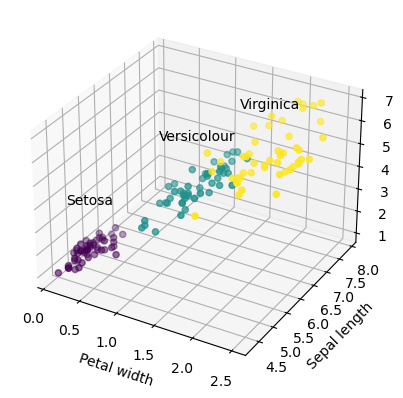

In [2]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_xlabel("Petal width"), ax.set_ylabel("Sepal length"), ax.set_zlabel("Petal length")

def set_labels():
    for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
        ax.text3D(X[y == label, 0].mean(), X[y == label, 1].mean(), X[y == label, 2].mean() + 2,
            name, horizontalalignment="center")
set_labels()
plt.show()

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_test_predict = clf.predict(X_test)
print('Exactitud = ', accuracy_score(y_test, y_test_predict))

Exactitud =  0.9777777777777777


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_p = pca.fit(X) 
X_p = pca.transform(X)

C:\Users\felea\AppData\Local\Temp\ipykernel_11636\3701179802.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis')


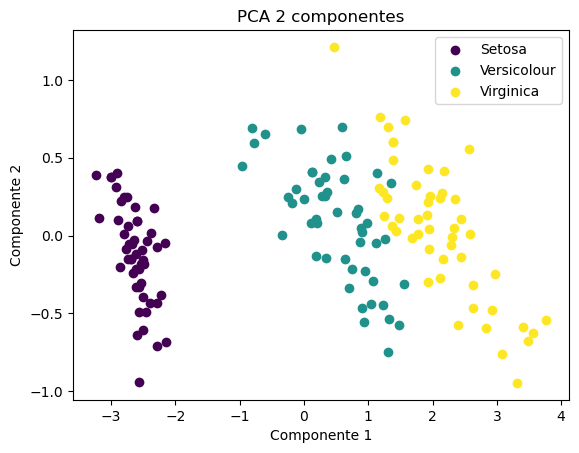

razón de la varianza (2 primeras componentes): [0.95806982 0.0342816 ]


In [6]:
import matplotlib as mpl
cmap = mpl.cm.get_cmap('viridis')

plt.scatter(X_p[y==0,0], X_p[y==0,1], color=cmap(0.), label="Setosa")
plt.scatter(X_p[y==1,0], X_p[y==1,1], color=cmap(0.5), label="Versicolour")
plt.scatter(X_p[y==2,0], X_p[y==2,1], color=cmap(1.), label="Virginica")

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA 2 componentes")
plt.xlabel('Componente 1'), plt.ylabel('Componente 2')
plt.show()
print("razón de la varianza (2 primeras componentes): %s" % str(pca.explained_variance_ratio_))

In [7]:
pca = PCA(n_components=1)
X_train_p = pca.fit(X_train).transform(X_train)
X_test_p = pca.transform(X_test)

clf = LogisticRegression(random_state=0).fit(X_train_p, y_train)
y_test_predict_p = clf.predict(X_test_p)
print('Exactitud = ', accuracy_score(y_test, y_test_predict_p))


Exactitud =  0.9111111111111111


# Análisis factorial

## Generalidades
Se busca describir variables, potencialmente correlacionadas, en términos de un menor número de variables latentes (no observadas).

<center>
    <img src="figures/fa-1.png" width="500"/>
</center>

Resulta similar al PCA, aunque las nuevas variables no son necesariamente ortogonales.

## Formulación
Dada una variable (atributo) $\mathbf{x}_{i}$ se construye un modelo:

\begin{split}
    \mathbf{x}_{i} = \mathbf{W} \mathbf{h}_{i} + \mathbf{\mu} + \mathbf{\epsilon}
 \end{split}
 
El vector $\mathbf{h}_{i}$ es la variable latente, $\mathbf{\mu}$ es un vector de offset y $\mathbf{\epsilon}$ es un ruido Gaussiano

Este modelo se conoce como "generativo" ya que explica como $\mathbf{x}_{i}$ es generado por $\mathbf{h}_{i}$

De manera general para todas las variables se tiene:

\begin{split}
    \mathbf{X} = \mathbf{W} \mathbf{H} + \mathbf{M} + \mathbf{E}
 \end{split}

## FA en Scikit

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html

In [9]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2)
X_f = fa.fit(X)
X_f = fa.transform(X)

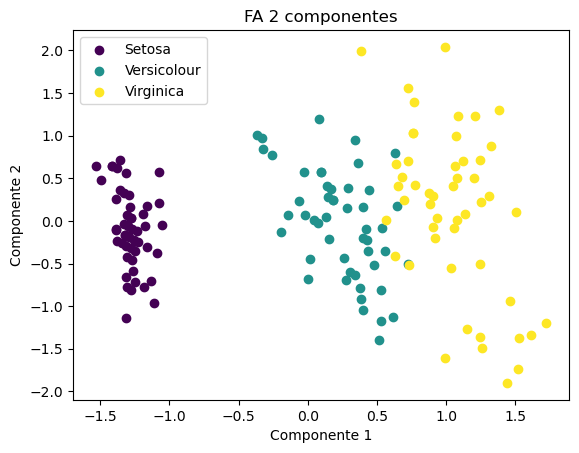

In [10]:
plt.scatter(X_f[y==0,0], X_f[y==0,1], color=cmap(0.), label="Setosa")
plt.scatter(X_f[y==1,0], X_f[y==1,1], color=cmap(0.5), label="Versicolour")
plt.scatter(X_f[y==2,0], X_f[y==2,1], color=cmap(1.), label="Virginica")

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("FA 2 componentes")
plt.xlabel('Componente 1'), plt.ylabel('Componente 2')
plt.show()


# Ejemplo turbina a gas

In [13]:
import pandas as pd
df = pd.read_excel('gas-turbine.xlsx', index_col=0)
X = df.values[:, 0:10]
y = df.values[:, 10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
display(df)

,t_in_comp,t_housing_comp,t_housing2_turb,t_housing4_turb,t_housing6_turb,t_out_turb,gas_fuel_flow,gas_fuel_pres,liq_fuel_flow,liq_fuel_pres,real_power,app_power,react_power
0,26.1,280.0,293,285,278,256.0,449,24.0,0.0,0.31,450.0,523,271.0
1,25.7,282.0,294,285,278,257.0,452,23.6,0.0,0.31,468.0,565,291.0
2,25.5,279.0,295,285,280,256.0,456,24.0,0.0,0.32,472.0,555,295.0
3,25.4,277.0,292,284,277,255.0,454,24.3,0.0,0.32,453.0,539,277.0
4,25.4,277.0,292,284,277,255.0,454,24.3,0.0,0.32,503.0,539,277.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,1250.0,545.0,554,563,530,530.0,997,24.3,0.0,0.12,3629.0,3835,1245.0
2942,1250.0,520.0,534,536,503,503.0,953,24.1,0.0,0.12,3400.0,3589,1162.0
2943,1250.0,582.0,541,553,516,516.0,979,24.2,0.0,0.13,3533.0,3758,1238.0
2944,1250.0,385.0,392,384,371,371.0,668,24.5,0.0,0.11,1821.0,1977,784.0


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#from matplotlib.pyplot import figure

regre = LinearRegression()
regre.fit(X_train, y_train)
y_train_predict = regre.predict(X_train)
y_test_predict = regre.predict(X_test)

print('el error de entrenamiento es MSE = ', mean_squared_error(y_train, y_train_predict))
print('el error de test es MSE = ', mean_squared_error(y_test, y_test_predict))

el error de entrenamiento es MSE =  36411.764254889116
el error de test es MSE =  29523.38028866882


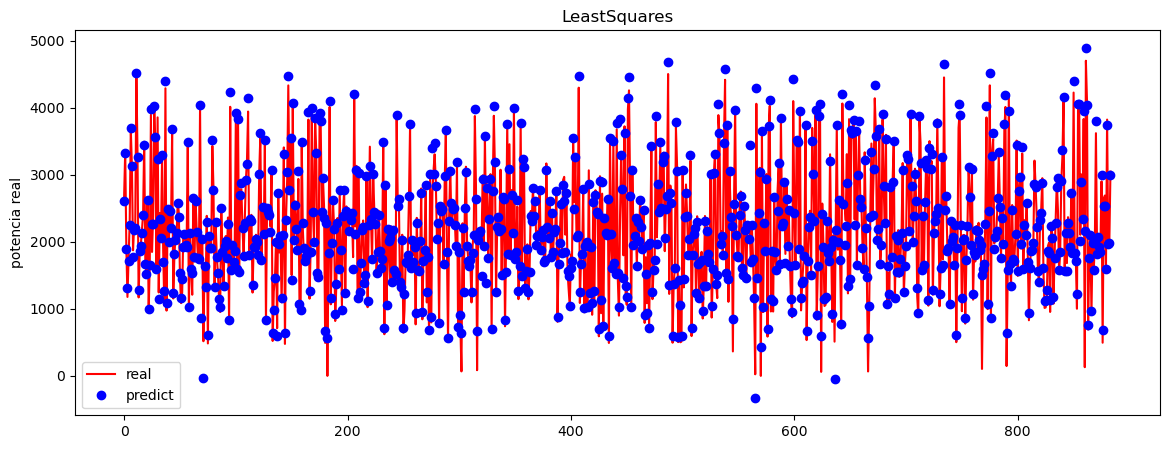

In [15]:
#%matplotlib inline
plt.figure(figsize=(14, 5))
plt.plot(y_test, 'r-', label='real')
plt.plot(y_test_predict, 'bo', label='predict')
plt.title('LeastSquares'), plt.ylabel('potencia real')
plt.legend()
plt.show()

In [16]:
pca = PCA(n_components=2)
X_train_p = pca.fit_transform(X_train)
X_test_p = pca.transform(X_test)
print("razón de la varianza (2 primeras componentes): %s" % str(pca.explained_variance_ratio_))

razón de la varianza (2 primeras componentes): [0.67603336 0.2666917 ]


In [17]:
regre = LinearRegression()
regre.fit(X_train_p, y_train)
y_train_predict = regre.predict(X_train_p)
y_test_predict = regre.predict(X_test_p)

print('el error de entrenamiento es MSE = ', mean_squared_error(y_train, y_train_predict))
print('el error de test es MSE = ', mean_squared_error(y_test, y_test_predict))

el error de entrenamiento es MSE =  261318.39256018546
el error de test es MSE =  233904.8585002916


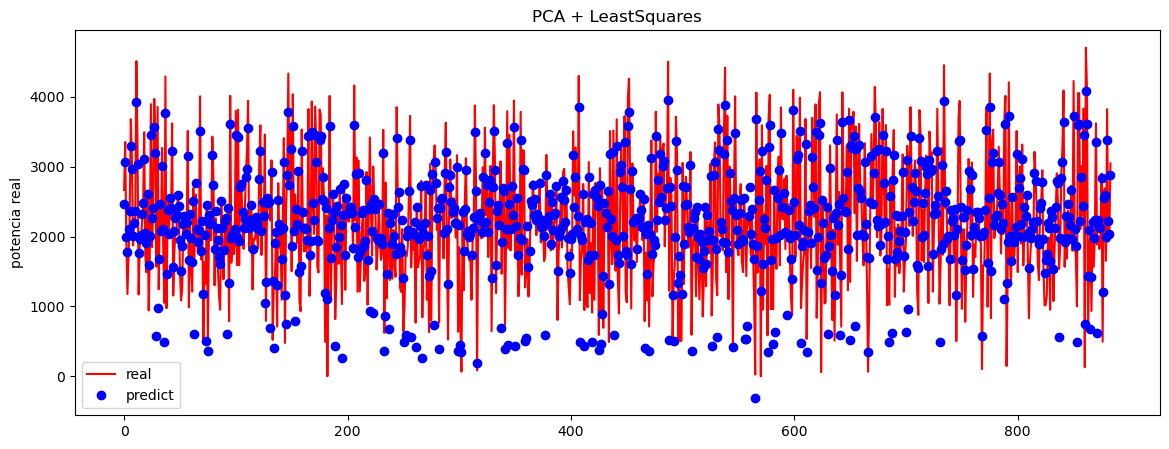

In [18]:
#%matplotlib inline
plt.figure(figsize=(14, 5))
plt.plot(y_test, 'r-', label='real')
plt.plot(y_test_predict, 'bo', label='predict')
plt.title('PCA + LeastSquares'), plt.ylabel('potencia real')
plt.legend()
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_ps = pca.fit_transform(X_train_s)
X_test_ps = pca.transform(X_test_s)
print("razón de la varianza (2 primeras componentes): %s" % str(pca.explained_variance_ratio_))

razón de la varianza (2 primeras componentes): [0.52726058 0.16724247]


In [20]:
regre = LinearRegression()
regre.fit(X_train_ps, y_train)
y_train_predict = regre.predict(X_train_ps)
y_test_predict = regre.predict(X_test_ps)

print('el error de entrenamiento es MSE = ', mean_squared_error(y_train, y_train_predict))
print('el error de test es MSE = ', mean_squared_error(y_test, y_test_predict))

el error de entrenamiento es MSE =  45571.658980168824
el error de test es MSE =  47932.60688228069


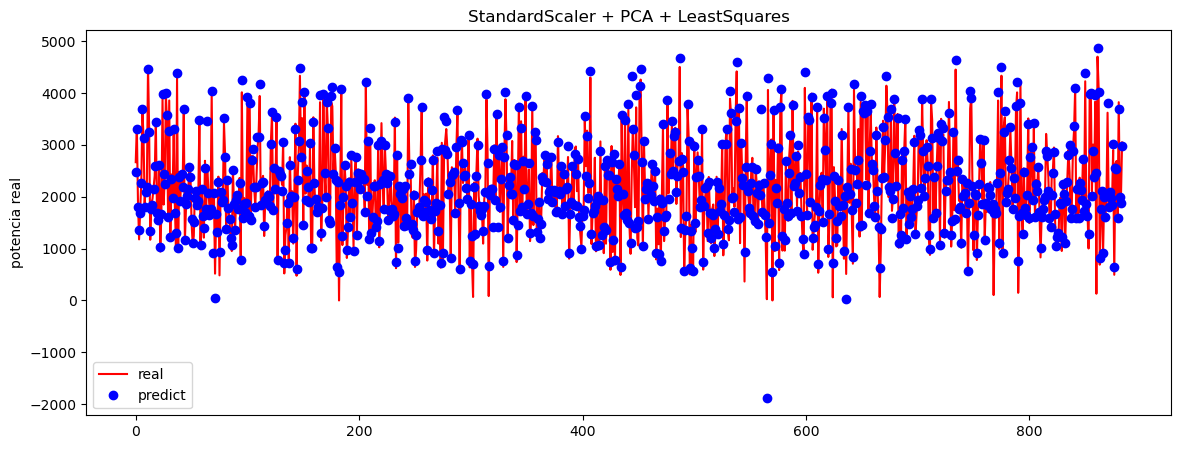

In [21]:
#%matplotlib inline
plt.figure(figsize=(14, 5))
plt.plot(y_test, 'r-', label='real')
plt.plot(y_test_predict, 'bo', label='predict')
plt.title('StandardScaler + PCA + LeastSquares'), plt.ylabel('potencia real')
plt.legend()
plt.show()

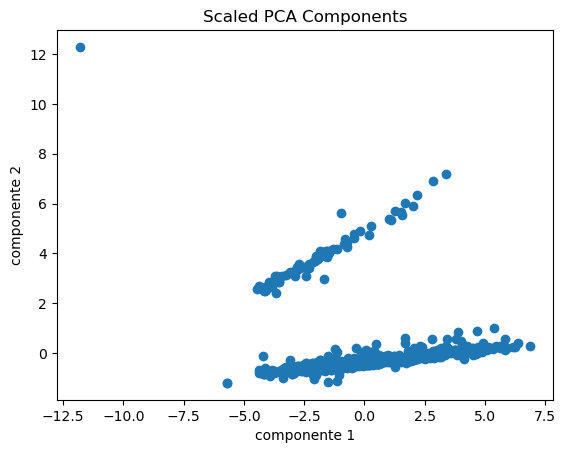

In [22]:
plt.scatter(X_test_ps[:, 0], X_test_ps[:, 1])
plt.xlabel('componente 1'), plt.ylabel('componente 2')
plt.title('Scaled PCA Components')
plt.show()

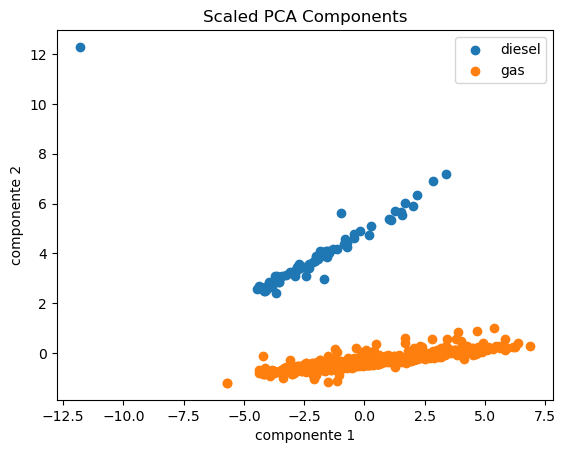

In [23]:
plt.scatter(X_test_ps[:, 0][X_test[:, 8] != 0.], X_test_ps[:, 1][X_test[:, 8] != 0.], label='diesel')
plt.scatter(X_test_ps[:, 0][X_test[:, 8] == 0.], X_test_ps[:, 1][X_test[:, 8] == 0.], label='gas')
plt.legend()
plt.xlabel('componente 1'), plt.ylabel('componente 2')
plt.title('Scaled PCA Components')
plt.show()

# Sumario
- Las técnicas de reducción de dimensionalidad sirven principalmente para evitar "la maldición de la dimensionalidad".
- El PCA permite encontrar dimensiones ortogonales que mejor representen a los datos
- El FA permite encontrar variables latentes no necesariamente ortogonales que mejor representen a los datos.